In [74]:
import sklearn.metrics as sm
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Логистическая регрессия - обзор

### Генерация данных

In [150]:
RANDOM_SEED = 1
CLUSTER_STD = 4

blobs = make_blobs(centers=2, cluster_std=CLUSTER_STD, random_state=RANDOM_SEED)
blobs[0][:5]

array([[ 1.80207061, -4.79966492],
       [-6.61306991, -7.39141231],
       [-7.43601513,  2.38862642],
       [-0.73918096,  7.45453459],
       [ 0.11559032, -4.94788766]])

In [151]:
blobs[1]

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

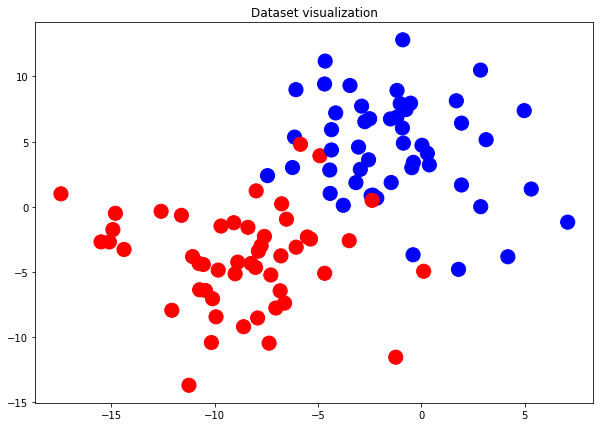

In [152]:
colors = ListedColormap(["blue", "red"])

plt.figure(figsize=(10,7))
plt.title("Dataset visualization")
plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1], cmap=colors, s=200)
plt.show()

In [153]:
X_train, X_test, y_train, y_test = train_test_split(blobs[0], blobs[1], test_size=0.3, random_state=RANDOM_SEED)

### Logistic Regression model

In [154]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [155]:
vars(logreg_model)

{'C': 1.0,
 'class_weight': None,
 'classes_': array([0, 1]),
 'coef_': array([[-0.71505731, -0.56146518]]),
 'dual': False,
 'fit_intercept': True,
 'intercept_': array([-1.69558368]),
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_iter_': array([7], dtype=int32),
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [156]:
print(f"Intercept: {logreg_model.intercept_}")
print(f"Coefs: {logreg_model.coef_}")

weights = np.append(logreg_model.intercept_, logreg_model.coef_)

Intercept: [-1.69558368]
Coefs: [[-0.71505731 -0.56146518]]


### Разделяющая поверхность

Разделяющая поверхность задается уравнением
$w_0 + w_1x_1 + w_2x_2 = 0$

Тогда $x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2}x_1$

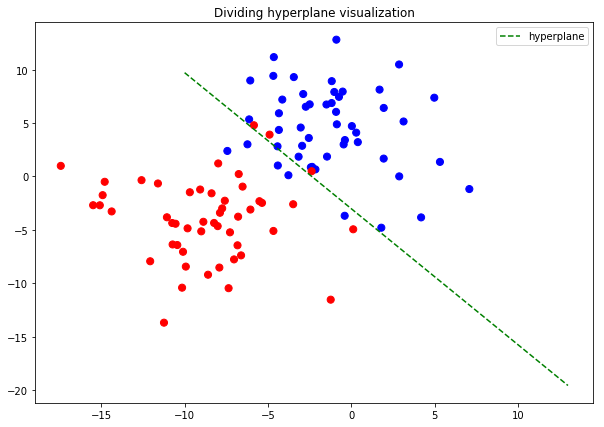

In [157]:
colors = ListedColormap(["blue", "red"])

x1 = np.linspace(-10, 13, 100)
x2 = - weights[0] / weights[2] - weights[1] / weights[2] * x1

plt.figure(figsize=(10,7))
plt.title("Dividing hyperplane visualization")
plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1], cmap=colors, s=50)
plt.plot(x1, x2, linestyle="--", color="green", label="hyperplane")
plt.legend()
plt.show()

In [158]:
preds = logreg_model.predict(X_test)
probs = logreg_model.predict_proba(X_test)[:,1]

preds[:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [97]:
probs[:10]

array([0.01201196, 0.99310167, 0.00243305, 0.8839428 , 0.99073482,
       0.44664123, 0.99970692, 0.99821066, 0.21174407, 0.01040134])

In [160]:
sm.accuracy_score(y_test, preds)

0.8666666666666667

In [161]:
sm.precision_score(y_test, preds)

0.75

In [162]:
sm.recall_score(y_test, preds)

1.0

In [163]:
?cross_val_score

In [164]:
cv_acc_scoring = cross_val_score(logreg_model, blobs[0], blobs[1], cv=5, scoring="accuracy")

print(f"5 folds accuracy: avg - {np.mean(cv_acc_scoring):.2f}, std - {np.std(cv_acc_scoring):.2f} - {cv_acc_scoring}")

5 folds accuracy: avg - 0.93, std - 0.06 - [0.9  1.   1.   0.85 0.9 ]


In [165]:
cv_prec_scoring = cross_val_score(logreg_model, blobs[0], blobs[1], cv=5, scoring="precision")

print(f"5 folds precision: avg - {np.mean(cv_prec_scoring):.2f}, std - {np.std(cv_prec_scoring):.2f} - {cv_prec_scoring:}")

5 folds precision: avg - 0.93, std - 0.09 - [0.83333333 1.         1.         0.81818182 1.        ]


In [166]:
cv_f_scoring = cross_val_score(logreg_model, blobs[0], blobs[1], cv=5, scoring="f1")

print(f"5 folds precision: avg - {np.mean(cv_f_scoring):.2f}, std - {np.std(cv_f_scoring):.2f} - {cv_f_scoring:}")

5 folds precision: avg - 0.93, std - 0.06 - [0.90909091 1.         1.         0.85714286 0.88888889]


### Перебор гиперпараметров на валидации

Схема валидации - стандартный KFold
Цель - подобрать оптимальное значение константы регуляризации C

In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
?scaler

In [168]:
from tqdm import tqdm

C_values = np.arange(1, 10000, 10)

best_score = 0
best_param = 0.1
best_model = None

early_stopping_rounds = 100
rounds_without_gain = 0

for C in tqdm(C_values):
    model = LogisticRegression(C=C)
    score = np.mean(cross_val_score(model, blobs[0], blobs[1], cv=5, scoring="accuracy"))
    
    if score > best_score:
        best_score = score
        best_model = model
        best_param = C
        rounds_without_gain = 0
    else:
        rounds_without_gain += 1
        
    if rounds_without_gain == early_stopping_rounds:
        print(f"Early stopping round achieved, no gain at {early_stopping_rounds}")
        break
        
print(f"Hyperparameters selection finished, best score - {best_score:0.4f} at C={best_param}")
best_model

  9%|▉         | 94/1000 [00:00<00:04, 182.08it/s]

Early stopping round achieved, no gain at 100
Hyperparameters selection finished, best score - 0.9300 at C=1


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Обзор стандартных метрик классификации

In [16]:
data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
probs = model.predict_proba(X_test)

### Accuracy

- Accuracy - доля объектов, ответы на которые совпали с реальными
- В принципе, можно интерпретировать как вероятность выбрать объект, для которого модель дала правильный ответ
- В случае несбалансированных классов нельзя использовать, т.к. непрезентативна

In [27]:
sm.accuracy_score(y_test, predictions)

0.9649122807017544

### Precision

- Precision (точность) - доля правильно угаданных классов среди всех объектов с ответом такого же класса
- Один из вариантов интерпретации - вероятность того, что выбранный объект с ответом действительно окажется объектом этого класса

In [29]:
sm.precision_score(y_test, predictions, average=None)

array([0.96721311, 0.96363636])

In [30]:
sm.precision_score(y_test, predictions)

0.9636363636363636

### Recall

- Recall (полтора) - количество предсказанных объектов с классом / суммарное количество объектов с этим классом
- Можно интерпретировать как вероятность того, что объект с таким-то классом будет отнесен моделью к этому классу

In [26]:
sm.recall_score(y_test, predictions, average=None)

array([0.93650794, 0.98148148])

In [31]:
sm.recall_score(y_test, predictions)

0.9814814814814815

### F1-score

$$F1 = \frac{2~precision~recall}{precision + recall}$$

F1-score это в первую очередь способ скомбинировать precision и recall в одну метрику

In [32]:
sm.f1_score(y_test, predictions)

0.9724770642201834

При помощи функции *classification_report* можно посмотреть на все эти метрики сразу

In [36]:
print(sm.classification_report(y_test, predictions, digits=4))

             precision    recall  f1-score   support

          0     0.9672    0.9365    0.9516        63
          1     0.9636    0.9815    0.9725       108

avg / total     0.9650    0.9649    0.9648       171



In [173]:
import pandas as pd

from sklearn.datasets import load_iris

sample_df = pd.DataFrame()
iris_data = load_iris()

In [178]:
sample_df["target"] = iris_data.target

for i in range(4):
    sample_df[f"x_{i}"] = iris_data.data[:,i]
    
sample_df.head()

,target,x_0,x_1,x_2,x_3
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
